<a href="https://colab.research.google.com/github/FGalvao77/Interpretando-o-modelo-com-o-framework-ELI5/blob/main/Interpretando_o_modelo_com_o_framework_ELI5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Interpretando o modelo com o _framework_ `ELI5`**

---



[`ELI5`](https://eli5.readthedocs.io/en/latest/) é uma biblioteca Python que permite visualizar e depurar vários modelos de aprendizado de máquina usando API unificada. Ele tem suporte integrado para várias estruturas de ML e fornece uma maneira de explicar os modelos de _caixa preta_.

**Eli** vem da expressão _Explain like I’m 5_, a tradução seria `"Explique como se eu tivesse 5 (anos)"`. <br>O sentido da expressão, é que você consiga explicar algo que até uma criança de 5 anos entenda.

**Leia mais em:**
- https://focanocliente.com.br/eli5-explain-like-im-5/

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np

**Importando o conjunto de dados**

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/ajmalbinnizam/car_price_prediction/master/car%20data.csv')
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


**Dicionário de dados:**
- `Car_name`: nome do modelo;
- `Year`: ano de fabricação;
- `Selling_Price`: preço efetivado na venda;
- `Present_Price`: preço estimado da tabela;
- `Kms_Driven`: km rodados;
- `Fuel_Type`: tipo de combustível;
- `Seller_Type`: tipo de vendedor;
- `Transmission`: tipo de transmissão;
- `Owner`: quantidade de proprietários.

**Análise exploratória e visualização dos dados**

In [133]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [4]:
df.shape

(301, 9)

In [5]:
df.nunique()

Car_Name          98
Year              16
Selling_Price    156
Present_Price    147
Kms_Driven       206
Fuel_Type          3
Seller_Type        2
Transmission       2
Owner              3
dtype: int64

In [8]:
df.duplicated().sum()

2

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.duplicated().sum()

0

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 299 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       299 non-null    object 
 1   Year           299 non-null    int64  
 2   Selling_Price  299 non-null    float64
 3   Present_Price  299 non-null    float64
 4   Kms_Driven     299 non-null    int64  
 5   Fuel_Type      299 non-null    object 
 6   Seller_Type    299 non-null    object 
 7   Transmission   299 non-null    object 
 8   Owner          299 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 23.4+ KB


In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,299.0,2013.615385,2.896868,2003.00,2012.00,2014.00,2016.00,2018.0
Selling_Price,299.0,4.589632,4.984240,0.10,0.85,3.51,6.00,35.0
Present_Price,299.0,7.541037,8.567887,0.32,1.20,6.10,9.84,92.6
Kms_Driven,299.0,36916.752508,39015.170352,500.00,15000.00,32000.00,48883.50,500000.0
Owner,299.0,0.043478,0.248720,0.00,0.00,0.00,0.00,3.0


In [13]:
df.describe(include='O').T

,count,unique,top,freq
Car_Name,299,98,city,26
Fuel_Type,299,3,Petrol,239
Seller_Type,299,2,Dealer,193
Transmission,299,2,Manual,260


In [14]:
df.corr()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
Year,1.000000,0.234369,-0.053563,-0.525714,-0.181639
Selling_Price,0.234369,1.000000,0.876378,0.028566,-0.087880
Present_Price,-0.053563,0.876378,1.000000,0.205253,0.009947
Kms_Driven,-0.525714,0.028566,0.205253,1.000000,0.089367
Owner,-0.181639,-0.087880,0.009947,0.089367,1.000000


In [15]:
df.corr()['Selling_Price']

Year             0.234369
Selling_Price    1.000000
Present_Price    0.876378
Kms_Driven       0.028566
Owner           -0.087880
Name: Selling_Price, dtype: float64

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

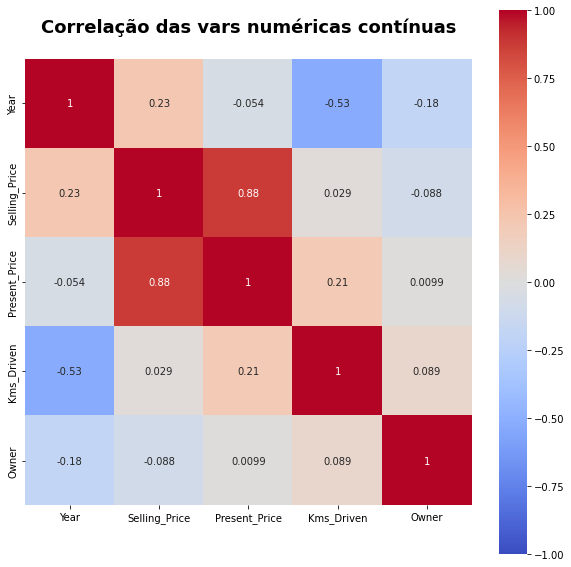

In [17]:
# gráfico de calor da correlação das variáveis numéricas
plt.figure(figsize=(10,10))

sns.heatmap(df.corr(), cmap='coolwarm', vmin=-1.0, 
            annot=True, vmax=1.0, square=True)
plt.title('Correlação das vars numéricas contínuas\n', 
          {'fontsize': 18,'fontweight': 'bold'});

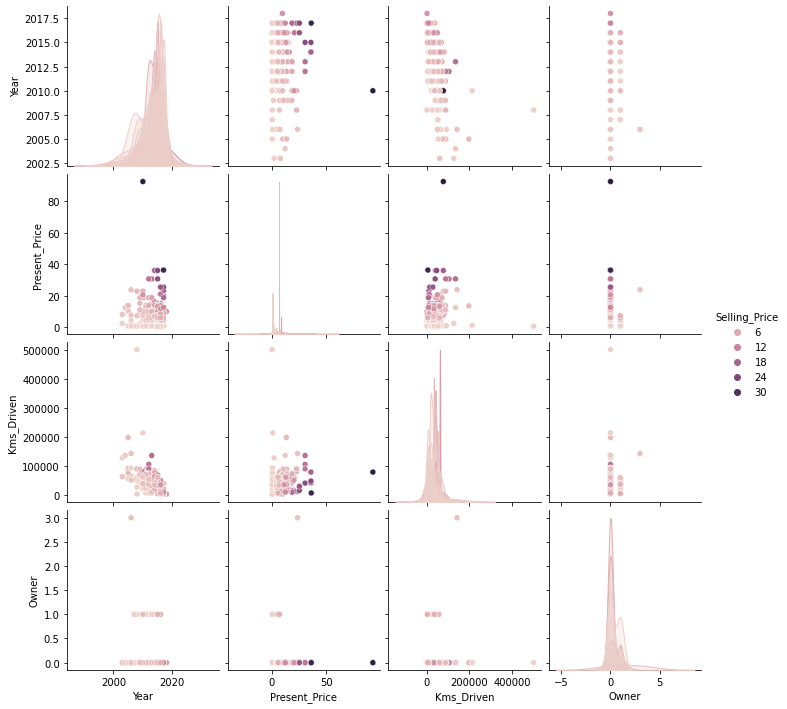

In [18]:
# com a função ".pairplot()" da biblioteca seaborn plotando diversos gráficos
sns.pairplot(data=df, hue='Selling_Price');

In [19]:
# realizando um ponto de corte da correlação entre as variáveis somente positiva
vars_num_corr = df.corr()['Selling_Price'][:-1]
important_feats = vars_num_corr[abs(vars_num_corr) >= 0.0].sort_values(ascending=False)

print(f'Há {len(important_feats)} atributos com forte correlação com a variável alvo (Selling_Price). \nSegue:')
important_feats

Há 4 atributos com forte correlação com a variável alvo (Selling_Price). 
Segue:


Selling_Price    1.000000
Present_Price    0.876378
Year             0.234369
Kms_Driven       0.028566
Name: Selling_Price, dtype: float64

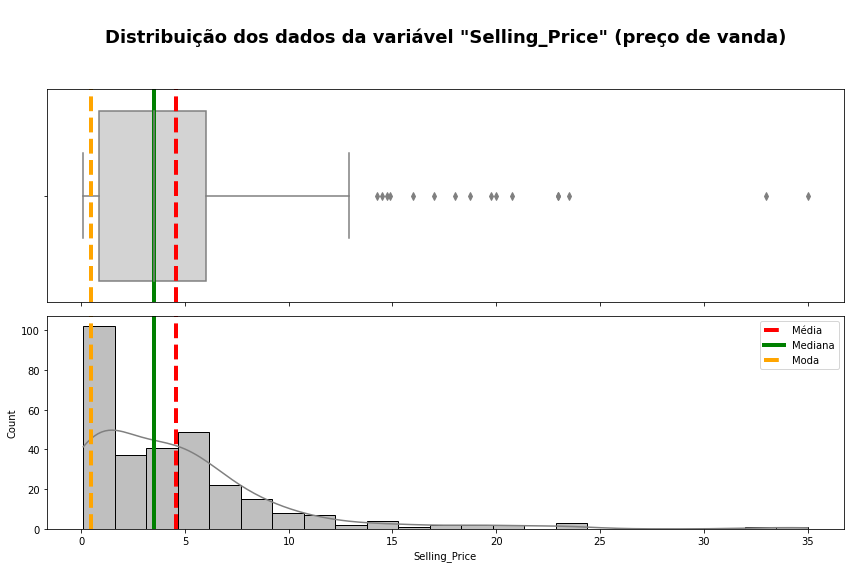

In [78]:
# plotando gráficos - boxplot e histograma da distribuição dos dados da variável "Selling_Price" (preço de venda)
mean = df['Selling_Price'].mean()
median = df['Selling_Price'].median()
mode = df['Selling_Price'].mode()[0]

fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, 
                                      figsize=(12,8))

sns.boxplot(data=df, x='Selling_Price', ax=ax_box, color='lightgray')
ax_box.axvline(mean, color='red', linestyle='--', linewidth=4)
ax_box.axvline(median, color='green', linestyle='-', linewidth=4)
ax_box.axvline(mode, color='orange', linestyle='--', linewidth=4)
ax_box.set(xlabel='')
ax_box.set_title('\nDistribuição dos dados da variável "Selling_Price" (preço de vanda)\n\n',
                 {'fontsize': 18,'fontweight': 'bold'})

sns.histplot(data=df, x='Selling_Price', ax=ax_hist, kde=True, color='gray')
ax_hist.axvline(mean, color='red', linestyle='--', label='Média', linewidth=4)
ax_hist.axvline(median, color='green', linestyle='-', label='Mediana', linewidth=4)
ax_hist.axvline(mode, color='orange', linestyle='--', label='Moda', linewidth=4)

ax_hist.legend()
plt.tight_layout();

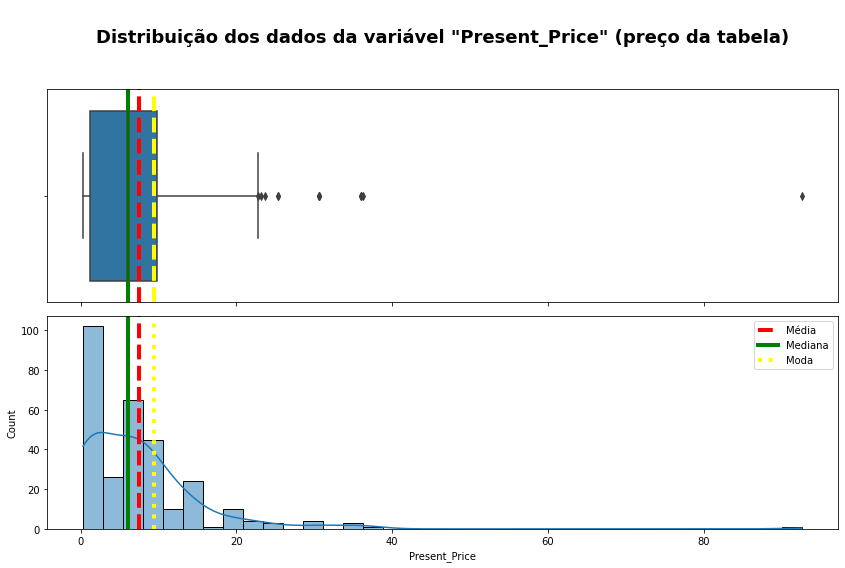

In [77]:
# plotando gráficos - boxplot e histograma da distribuição dos dados da variável "Present_Price" (preço da tabela)
mean = df['Present_Price'].mean()
median = df['Present_Price'].median()
mode = df['Present_Price'].mode()[0]

fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, 
                                      figsize=(12,8))

sns.boxplot(data=df, x='Present_Price', ax=ax_box)
ax_box.axvline(mean, color='r', linestyle='--', linewidth=4)
ax_box.axvline(median, color='g', linestyle='-', linewidth=4)
ax_box.axvline(mode, color='yellow', linestyle='--', linewidth=4)
ax_box.set(xlabel='')
ax_box.set_title('\nDistribuição dos dados da variável "Present_Price" (preço da tabela)\n\n',
                 {'fontsize': 18,'fontweight': 'bold'})

sns.histplot(data=df, x='Present_Price', ax=ax_hist, kde=True)
ax_hist.axvline(mean, color='red', linestyle='--', label='Média', linewidth=4)
ax_hist.axvline(median, color='green', linestyle='-', label='Mediana', linewidth=4)
ax_hist.axvline(mode, color='yellow', linestyle=':', label='Moda', linewidth=4)

ax_hist.legend()
plt.tight_layout();

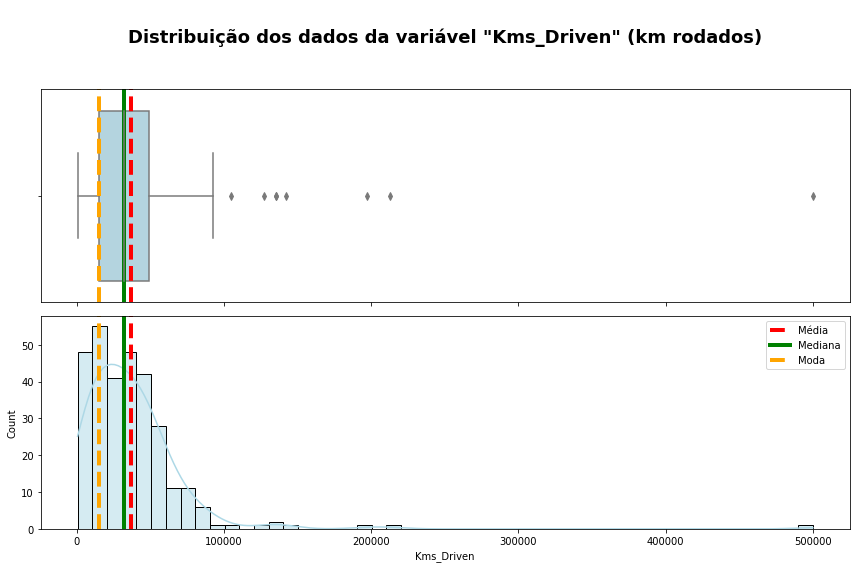

In [76]:
# plotando gráficos - boxplot e histograma da distribuição dos dados da variável "Kms_Driven" (km rodados)
mean = df['Kms_Driven'].mean()
median = df['Kms_Driven'].median()
mode = df['Kms_Driven'].mode()[0]

fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, 
                                      figsize=(12,8))

sns.boxplot(data=df, x='Kms_Driven', ax=ax_box, color='lightblue')
ax_box.axvline(mean, color='r', linestyle='--', linewidth=4)
ax_box.axvline(median, color='g', linestyle='-', linewidth=4)
ax_box.axvline(mode, color='orange', linestyle='--', linewidth=4)
ax_box.set(xlabel='')
ax_box.set_title('\nDistribuição dos dados da variável "Kms_Driven" (km rodados)\n\n',
                 {'fontsize': 18,'fontweight': 'bold'})

sns.histplot(data=df, x='Kms_Driven', ax=ax_hist, kde=True, color='lightblue')
ax_hist.axvline(mean, color='red', linestyle='--', label='Média', linewidth=4)
ax_hist.axvline(median, color='green', linestyle='-', label='Mediana', linewidth=4)
ax_hist.axvline(mode, color='orange', linestyle='--', label='Moda', linewidth=4)

ax_hist.legend()
plt.tight_layout();

In [47]:
# eliminando o atributo "Car_Name"
df.drop('Car_Name', axis=1, inplace=True)

In [48]:
df.columns

Index(['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Fuel_Type',
       'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

**Engenharia de atributos**

- criando a variável idade do carro.

In [49]:
df['Current_Year'] = 2022

In [50]:
df['Age_Car'] = df['Current_Year'] - df['Year']

In [51]:
df

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year,Age_Car
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2022,8
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2022,9
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2022,5
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2022,11
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2022,8
...,...,...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0,2022,6
297,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0,2022,7
298,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0,2022,13
299,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0,2022,5


In [52]:
df.drop(['Year', 'Current_Year'], axis=1, inplace=True)

In [53]:
df.sample(5)

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age_Car
53,16.00,30.61,135000,Diesel,Individual,Automatic,0,9
24,2.90,4.41,56879,Petrol,Dealer,Manual,0,9
220,3.50,4.43,38488,Petrol,Dealer,Manual,0,5
279,6.25,13.60,40126,Petrol,Dealer,Manual,0,8
190,0.20,0.75,60000,Petrol,Individual,Manual,0,14


**One-hot encoding**
- tratando as variáveis categóricas.

In [54]:
df = pd.get_dummies(df, drop_first=True)

In [55]:
df

,Selling_Price,Present_Price,Kms_Driven,Owner,Age_Car,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,8,0,1,0,1
1,4.75,9.54,43000,0,9,1,0,0,1
2,7.25,9.85,6900,0,5,0,1,0,1
3,2.85,4.15,5200,0,11,0,1,0,1
4,4.60,6.87,42450,0,8,1,0,0,1
...,...,...,...,...,...,...,...,...,...
296,9.50,11.60,33988,0,6,1,0,0,1
297,4.00,5.90,60000,0,7,0,1,0,1
298,3.35,11.00,87934,0,13,0,1,0,1
299,11.50,12.50,9000,0,5,1,0,0,1


**Verficando a correlação entre as variáveis**

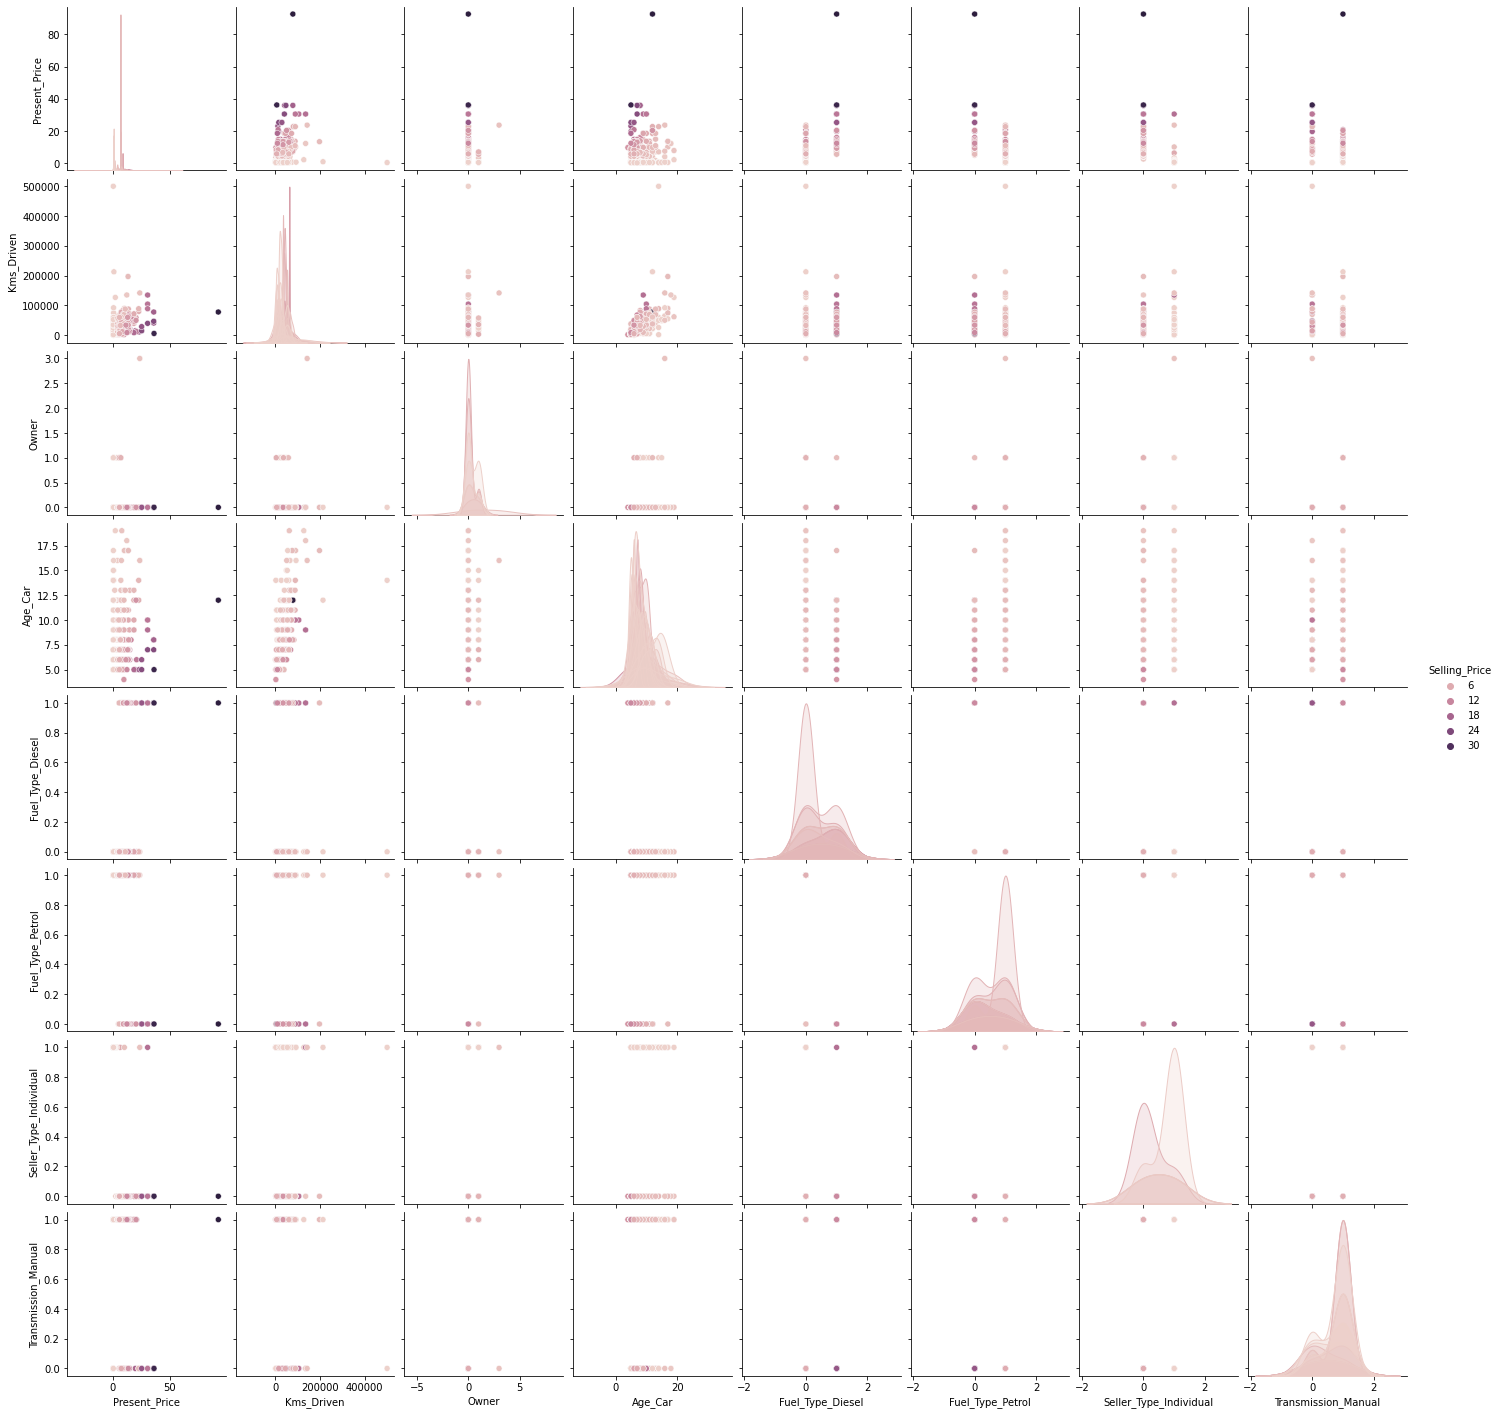

In [56]:
# com a função ".pairplot()" da biblioteca seaborn plotando diversos gráficos
sns.pairplot(data=df, hue='Selling_Price');

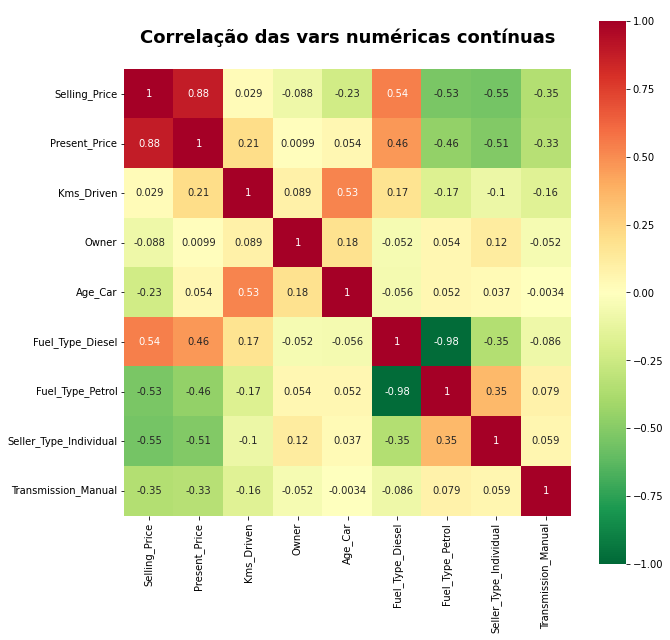

In [75]:
# gráfico de calor da correlação das variáveis numéricas
plt.figure(figsize=(10,10))

sns.heatmap(df.corr(), vmin=-1.0, vmax=1.0,
            annot=True, cmap='RdYlGn_r', square=True)
plt.title('\nCorrelação das vars numéricas contínuas\n', 
          {'fontsize': 18,'fontweight': 'bold'});

**Separando as variáveis explicativas (X) e a variável resposta (y)**

In [61]:
X = df.drop('Selling_Price', axis=1)
y = df['Selling_Price']

# X = df.iloc[:, 1:]
# y = df.iloc[:, 0]

In [62]:
len(X), len(y)

(299, 299)

In [64]:
print(
    f'\t\t++++++ [INFO] 5 amostras +++++\n'
    '\t\t==============================',
    f'Variáveis explicativas (X): \n{X.head().T}', 
    f'Variável resposta (y): \n{np.array(y[:5])}',
    sep='\n\n' 
)

		++++++ [INFO] 5 amostras +++++

Variáveis explicativas (X): 
                               0         1        2        3         4
Present_Price               5.59      9.54     9.85     4.15      6.87
Kms_Driven              27000.00  43000.00  6900.00  5200.00  42450.00
Owner                       0.00      0.00     0.00     0.00      0.00
Age_Car                     8.00      9.00     5.00    11.00      8.00
Fuel_Type_Diesel            0.00      1.00     0.00     0.00      1.00
Fuel_Type_Petrol            1.00      0.00     1.00     1.00      0.00
Seller_Type_Individual      0.00      0.00     0.00     0.00      0.00
Transmission_Manual         1.00      1.00     1.00     1.00      1.00

Variável resposta (y): 
[3.35 4.75 7.25 2.85 4.6 ]


In [65]:
from sklearn.ensemble import ExtraTreesRegressor

In [66]:
model = ExtraTreesRegressor()
model

ExtraTreesRegressor()

In [67]:
model.fit(X, y)

ExtraTreesRegressor()

In [68]:
model.get_params()

{'bootstrap': False,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [69]:
model.feature_importances_

array([4.41142045e-01, 3.97303913e-02, 2.86639304e-04, 8.63216055e-02,
       7.98101039e-02, 2.81726226e-02, 2.46525949e-01, 7.80106431e-02])

In [70]:
feature_imortances = pd.Series(model.feature_importances_, 
                               index=X.columns)

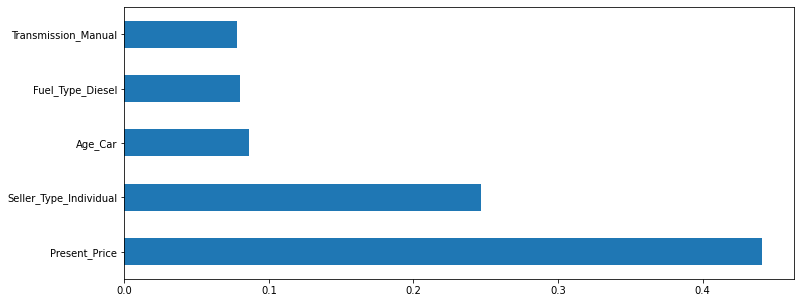

In [72]:
plt.figure(figsize=(12,5))
feature_imortances.nlargest(5).plot(kind='barh');

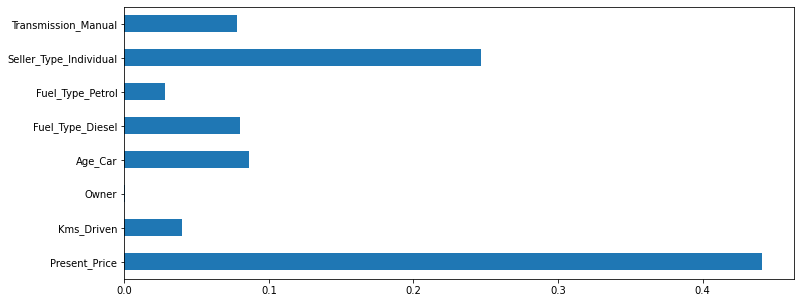

In [73]:
plt.figure(figsize=(12,5))
feature_imortances.plot(kind='barh')
plt.show();

In [79]:
from sklearn.model_selection import train_test_split

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=42)

In [81]:
print(
    f'X_train: {X_train.shape}',
    f'X_test: {X_test.shape}',
    f'y_train: {y_train.shape}',
    f'y_test: {y_test.shape}',
    sep='\n'
)

X_train: (209, 8)
X_test: (90, 8)
y_train: (209,)
y_test: (90,)


In [82]:
from sklearn.ensemble import RandomForestRegressor

In [83]:
rf = RandomForestRegressor()
rf

RandomForestRegressor()

**Tunando os hiperparâmetros com `RandomSearchCV`**

In [97]:
# número de árvores no random forest
n_estimators = [int(x) for x in np.linspace(start=50,
                                            stop=1500, 
                                            num=15)]

# número de recursos a serem considerados em cada divisão
max_features = ['auto', 'sqrt']

# número máximo de níveis na árvore
max_depth = [int(x) for x in np.linspace(5,150,20)]

# número mínimo de amostras necessárias para dividir um nó
min_samples_split = [2,5,20,50,100]

# número mínimo de amostras necessárias em cada nó folha
min_samples_leaf = [2,5,10,25]

In [98]:
from sklearn.model_selection import RandomizedSearchCV

In [99]:
params_grid = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf
}

params_grid

{'max_depth': [5,
  12,
  20,
  27,
  35,
  43,
  50,
  58,
  66,
  73,
  81,
  88,
  96,
  104,
  111,
  119,
  127,
  134,
  142,
  150],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [2, 5, 10, 25],
 'min_samples_split': [2, 5, 20, 50, 100],
 'n_estimators': [50,
  153,
  257,
  360,
  464,
  567,
  671,
  775,
  878,
  982,
  1085,
  1189,
  1292,
  1396,
  1500]}

In [114]:
rf_gridSearch = RandomizedSearchCV(
    estimator=rf,
    param_distributions=params_grid,
    scoring='neg_mean_squared_error',
    n_iter=20,
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=20,
                   n_jobs=-1,
                   param_distributions={'max_depth': [5, 12, 20, 27, 35, 43, 50,
                                                      58, 66, 73, 81, 88, 96,
                                                      104, 111, 119, 127, 134,
                                                      142, 150],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [2, 5, 10, 25],
                                        'min_samples_split': [2, 5, 20, 50,
                                                              100],
                                        'n_estimators': [50, 153, 257, 360, 464,
                                                         567, 671, 775, 878,
                                                         982, 1085, 1189, 1292,
                                                         1396, 1

In [115]:
rf_gridSearch.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=20,
                   n_jobs=-1,
                   param_distributions={'max_depth': [5, 12, 20, 27, 35, 43, 50,
                                                      58, 66, 73, 81, 88, 96,
                                                      104, 111, 119, 127, 134,
                                                      142, 150],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [2, 5, 10, 25],
                                        'min_samples_split': [2, 5, 20, 50,
                                                              100],
                                        'n_estimators': [50, 153, 257, 360, 464,
                                                         567, 671, 775, 878,
                                                         982, 1085, 1189, 1292,
                                                         1396, 1

**Avaliando os melhores parâmetros**

In [118]:
print(f'Os melhores hiperparâmetros são: \n{rf_gridSearch.best_params_}')

Os melhores hiperparâmetros são: 
{'n_estimators': 360, 'min_samples_split': 20, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 35}


**Avaliando a máquina preditiva**

In [119]:
print(f'O melhor score: \n{-rf_gridSearch.best_score_}')

O melhor score: 
2.6830477399709913


**Interpretabilidade da máquina preditiva**

In [120]:
# instalando a biblioteca
!pip install eli5

     |████████████████████████████████| 106 kB 5.3 MB/s 


In [121]:
import eli5

In [122]:
from eli5.sklearn import PermutationImportance

In [133]:
perm = PermutationImportance(rf_gridSearch, 
                             random_state=42).fit(X_test, y_test)

eli5.show_weights(perm, feature_names=X_test.columns.tolist())        

Weight,Feature
31.8155 ± 12.7020,Present_Price
3.6924 ± 0.7601,Age_Car
0.0275 ± 0.0158,Seller_Type_Individual
0.0116 ± 0.0056,Kms_Driven
0.0001 ± 0.0000,Transmission_Manual
0.0000 ± 0.0000,Owner
0 ± 0.0000,Fuel_Type_Petrol
0 ± 0.0000,Fuel_Type_Diesel


In [129]:
pred = rf_gridSearch.predict(X_test)
pred[:10]

array([ 8.57066467,  7.75330883,  0.39472975,  7.50887582, 20.11222646,
        5.24382376,  6.36521158,  1.20396372,  7.80508661,  0.48066212])

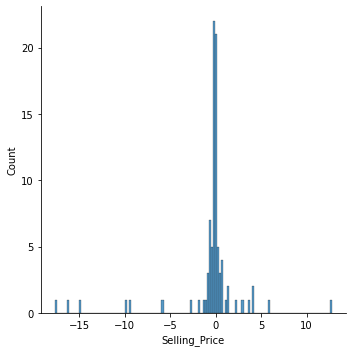

In [135]:
sns.displot(y_test-pred);

In [137]:
import pickle as pk

In [138]:
file = open('random_forest_regr_model.pkl', 
            'wb')

pk.dump(rf_gridSearch, file)